# The Sparks Foundation Internship

# Task - 2 : Prediction Using Unsupervised ML

## BY : HARINI VISWANATHAN

In [1]:
#Importing the modules from respective packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#load the data
df = pd.read_csv('C:\\Users\\HARINI\\Documents\\SPARKS_FOUNDATION\\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Using Elbow Method to find out the Clusters

In [7]:
x = df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans

wcss = [] #within cluster sum of square

for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init = "k-means++",max_iter =300,n_init = 10,random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986]

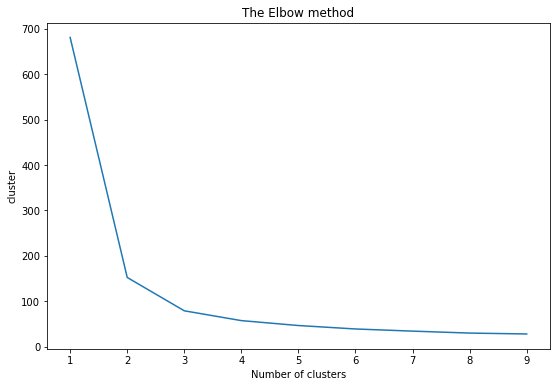

In [8]:
#plotting graph
plt.figure(figsize=(9,6))
plt.plot(range(1,10),wcss)
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("cluster")
plt.show()

## From the above graph we can find out the optimum no. of clusters to be 3 as the elbow starts having a straight trend after 3

In [10]:
#Applying Kmeans
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init =10, random_state = 0)
y = kmeans.fit_predict(x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [11]:
cl = pd.Series(kmeans.labels_)
df['cluster']=cl

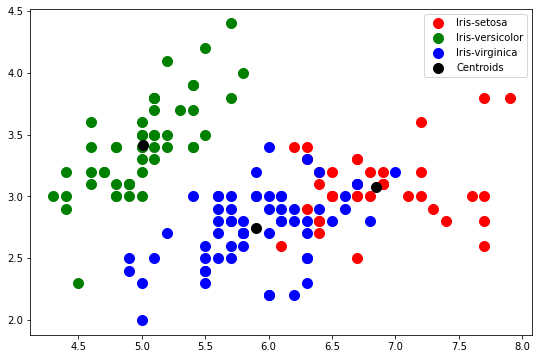

In [13]:
#Visualising the clusters
plt.figure(figsize=(9,6))
plt.scatter(x[y==0,0],x[y==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y==1,0],x[y==1,1],s=100,c="green",label="Iris-versicolor")
plt.scatter(x[y==2,0],x[y==2,1],s=100,c="blue",label="Iris-virginica")
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="Centroids")
plt.legend()
plt.show()

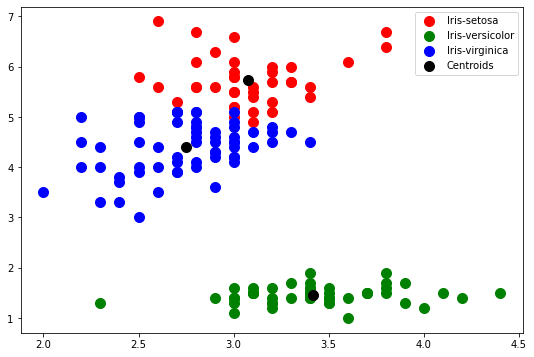

In [15]:
#Visualising the clusters - On the first two columns
plt.figure(figsize=(9,6))
plt.scatter(x[y == 0,1],x[y == 0,2],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y == 1,1],x[y == 1,2],s=100,c='green',label='Iris-versicolor')
plt.scatter(x[y == 2,1],x[y == 2,2],s=100,c='blue',label='Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=100,c="black",label="Centroids")
plt.legend()
plt.show()

In [16]:
#Representing the data with cluster column
df.iloc[:,:]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [18]:
x=[6.3,2.5,5.0,1.9]
kmeans.predict([x])

array([2])

In [19]:
x=[5.1,3.5,1.4,0.2]
kmeans.predict([x])

array([1])

Through this we can assume that our model is predicting accurately.